<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>

hello

<font size = 200><center>Thống kê suy diễn</center></font>
<hr  width="30%" align="center" />
<p align='right'>Phan Thế Minh Châu</p>
<p align='right'>20E1020067</p>
<br>

**khai báo thư viện:**

In [16]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

Using matplotlib backend: agg


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/PhanTheMinhChau/phantichdulieupython/main/data/Diet_R.csv")
df.sample(10)

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
8,7,0,37,174,67,1,65.0
11,10,0,45,165,70,1,66.9
68,69,1,29,166,76,3,72.5
61,47,1,44,163,79,2,73.6
64,50,1,39,180,80,2,81.4
45,15,1,39,168,71,1,71.6
32,54,0,21,159,64,3,60.6
28,39,0,30,161,76,2,72.7
47,17,1,40,173,74,1,69.5
62,48,1,40,171,79,2,72.9


**làm sạch dữ liệu:**

In [3]:
df.replace(" ", np.nan, inplace=True) #chuyển đổi các ô trống sang NaN
df.dropna(inplace=True) #Xóa các hàng có giá trị NaN
df.sample(10)

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
62,48,1,40,171,79,2,72.9
10,9,0,28,165,70,1,68.1
58,44,1,33,190,76,2,72.5
26,37,0,16,165,68,2,63.8
74,75,1,49,177,84,3,79.9
46,16,1,31,158,72,1,70.9
50,20,1,25,165,80,1,77.6
48,18,1,50,160,78,1,73.9
20,31,0,20,169,62,2,55.0
69,70,1,37,173,78,3,77.5


##**Các hàm phân tích ANOVA**

###Kiểm tra phân phối chuẩn:
**Phát biểu giả thiết:**
- H0: mẫu tuân theo phân phối chuẩn
- H1: Mẫu không tuân theo phân phối chuẩn

In [4]:
def shapiro(data): # kiểm tra phân phối chẩn hay không
    series = []
    for i in data.columns:
        series.append(data[i].dropna())
    for j in series:
        sts, p = stats.shapiro(j)
        if p > 0.05:
            print(f'không có bằng chứng để bác bỏ giả thiết H0: mẫu {j.name} tuân theo phân phối chuẩn')
        else:
            print(f'có bằng chứng để bác bỏ giả thiết H0, điều này ngụ ý chấp nhận giả thiết H1: mẫu {j.name} không tuân theo phân phối chuẩn')
    print()

###kiểm tra tính đồng nhất phương sai:
**Phát biểu giả thiết:**
- H0: Phương sai đồng nhất
- H1: phương sai không đồng nhất

In [5]:
def levene(data): # khiểm tra tính đồng nhất phương sai
    series = []
    for i in data.columns:
        series.append(data[i].dropna())
    sts, p = stats.levene(*series)
    if p > 0.05:
        print(f'không có bằng chứng để bác bỏ giả thiết H0: Phương sai đồng nhất\n')
    else:
        print(f'có bằng chứng để bác bỏ giả thiết H0, điều này ngụ ý chấp nhận giả thiết H1: phương sai không đồng nhất\n')


###Kiểm tra tính đồng nhất về giá trị trung bình:
**Phát biểu giả thiết:**
- H0: các giá trị trung bình bằng nhau
- H1: Có tối thiểu một cặp giá trị trung bình có giá trị khác nhau

In [6]:
def anova(data):
    series = []
    for i in data.columns:
        series.append(data[i].dropna())
    sts, p = stats.f_oneway(*series)
    if p > 0.05:
        print('không có bằng chứng để bác bỏ giả thiết H0: các giá trị trung bình bằng nhau')
    else:
        print('có bằng chứng để bác bỏ giả thiết H0, điều này ngụ ý chấp nhận giả thiết H1: Có tối thiểu một cặp giá trị trung bình có giá trị khác nhau')

##Tiến hành phân tích:

###**Ignore diet and test to see if weight has been lost** (Bỏ qua chế độ ăn kiêng và kiểm tra xem đã giảm cân chưa?)

**phát biểu giả thiết:**
- h0: Cân nặng trước khi kiểm tra và sau khi kiểm tra bằng nhau
- h1: Cân nặng trước khi kiểm tra và sau khi kiểm tra không bằng nhau

In [7]:
stat, p = stats.ttest_ind(df["pre.weight"], df["weight6weeks"])
print('Stat =', stat, 'P_value =', p)
if p > 0.05:
    print("không có bằng chứng để bác bỏ giả thiết H0: Cân nặng trước khi kiểm tra và sau khi kiểm tra bằng nhau")
else:
    print("có bằng chứng để bác bỏ giả thiết H0, điều này ngụ ý chấp nhận giả thiết H1: Cân nặng trước khi kiểm tra và sau khi kiểm tra không bằng nhau")

Stat = 3.0342255247628476 P_value = 0.0028431949414180584
có bằng chứng để bác bỏ giả thiết H0, điều này ngụ ý chấp nhận giả thiết H1: Cân nặng trước khi kiểm tra và sau khi kiểm tra không bằng nhau


###**Remove weight lost and get students to calculate it using before/after weights**

In [8]:
weight_lost = df["pre.weight"] - df["weight6weeks"] 
df['weightlost'] = weight_lost.values
df.sample(10)

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,weightlost
66,67,1,36,155,71,3,68.5,2.5
76,77,1,40,167,87,3,77.8,9.2
48,18,1,50,160,78,1,73.9,4.1
62,48,1,40,171,79,2,72.9,6.1
40,62,0,31,170,72,3,71.1,0.9
53,23,1,39,166,87,1,81.9,5.1
17,28,0,37,172,58,2,56.0,2.0
44,66,0,41,157,76,3,71.0,5.0
3,2,0,46,192,60,1,54.0,6.0
19,30,0,43,171,61,2,56.7,4.3


###**Summary statistics by diet**

In [9]:
# phân nhóm giá trị weightlost theo diet
weightlost_1 = df[(df['Diet'] == 1)]["weightlost"]
weightlost_2 = df[(df['Diet'] == 2)]["weightlost"]
weightlost_3 = df[(df['Diet'] == 3)]["weightlost"]
weight_lost = list(zip(weightlost_1, weightlost_2, weightlost_3))
df_diet =  pd.DataFrame(weight_lost, columns = ("Diet 1", "Diet 2", "Diet 3"))
df_diet

,Diet 1,Diet 2,Diet 3
0,3.8,-2.1,7.0
1,6.0,2.0,5.6
2,0.7,1.7,3.4
3,2.9,4.3,6.8
4,2.8,7.0,7.8
5,2.0,0.6,5.4
6,2.0,2.7,6.8
7,8.5,3.6,7.2
8,1.9,3.0,7.0
9,3.1,2.0,7.3


        min  max      mean  median       std
Diet 1 -0.6  9.0  3.300000    3.05  2.240148
Diet 2 -2.1  7.9  3.225000    3.40  2.507944
Diet 3  0.5  8.6  4.933333    5.20  2.384309




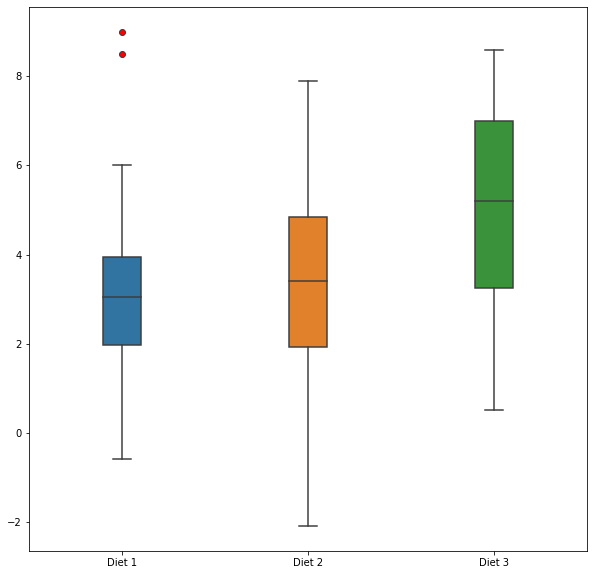

In [43]:
#Thống kê tóm tắt theo chế độ ăn uống
su_stat = df_diet.agg(
      {
          "Diet 1": ["min", "max", "mean", "median", "std"],
          "Diet 2": ["min", "max", "mean", "median", "std"],
          "Diet 3": ["min", "max", "mean", "median", "std"]
      }
).T
print(su_stat)
print("\n")
def box_plot(data): #vẽ đồ thị boxplot
  fig, ax = plt.subplots(figsize=(10,10))
  sns.boxplot(data= data,width=0.2, fliersize=12, flierprops = dict(marker=".",markerfacecolor='r'))
box_plot(df_diet)

###**kiểm định ANOVA**

In [11]:
shapiro(df_diet) #kiểm tra độ lệch chuẩn  
levene(df_diet)  #kiểm tra tính đồng nhất về phương sai
anova(df_diet)   #kiểm định ANOVA

không có bằng chứng để bác bỏ giả thiết H0: mẫu Diet 1 tuân theo phân phối chuẩn
không có bằng chứng để bác bỏ giả thiết H0: mẫu Diet 2 tuân theo phân phối chuẩn
không có bằng chứng để bác bỏ giả thiết H0: mẫu Diet 3 tuân theo phân phối chuẩn

không có bằng chứng để bác bỏ giả thiết H0: Phương sai đồng nhất

có bằng chứng để bác bỏ giả thiết H0, điều này ngụ ý chấp nhận giả thiết H1: Có tối thiểu một cặp giá trị trung bình có giá trị khác nhau


In [12]:
p = {}
p['mean1'] = np.mean(df_diet["Diet 1"])
p['mean2'] = np.mean(df_diet["Diet 2"])
p['mean3'] = np.mean(df_diet["Diet 3"])
dt = pd.DataFrame(p, index=[''])
dt

,mean1,mean2,mean3
,3.3,3.225,4.933333


**=> kết luận:** chế độ ăn ảnh hưởng đến việc giảm cân
- chế độ ăn hiệu quả nhất là nhóm diet 3

###**Giới tính**

**phát biểu giả thiết:**
- h0: Chỉ số giảm cân của nam và nữ bằng nhau
- h1: Chỉ số giảm cân của nam và nữ khác nhau

In [13]:
stat, p = stats.ttest_ind(df[(df["gender"] == '0')]["weightlost"], df[(df["gender"] == '1')]["weightlost"])
print('Stat =', stat, 'P_value =', p)
if p > 0.05:
    print("không có bằng chứng để bác bỏ giả thiết H0: Chỉ số giảm cân của nam và nữ bằng nhau")
else:
    print("có bằng chứng để bác bỏ giả thiết H0, điều này ngụ ý chấp nhận giả thiết H1: Chỉ số giảm cân của nam và nữ khác nhau")

Stat = -0.20925085653363862 P_value = 0.8348273886348047
không có bằng chứng để bác bỏ giả thiết H0: Chỉ số giảm cân của nam và nữ bằng nhau


###**chiều cao**

In [14]:
# phân nhóm theo chiều cao
height_1 = df[(df['Height'] < 160)]["weightlost"]                        #chiều cao dưới 160 cm
height_2 = df[(df['Height'] < 170)][(df['Height'] >= 160)]["weightlost"] #chiều cao từ 160 đến dưới 170 cm
height_3 = df[(df['Height'] < 180)][(df['Height'] >= 170)]["weightlost"] #chiều cao từ 170 đến dưới 180 cm 
height_4 = df[(df['Height'] >= 180)]["weightlost"]                       #chiều cao trên 180 cm
#lấy mẫu để kiểm định anova
height_sp1 = height_1.sample(9)
height_sp2 = height_2.sample(9)
height_sp3 = height_3.sample(9)
height_sp4 = height_4.sample(9)
#
weight_lost = list(zip(height_sp1, height_sp2, height_sp3, height_sp4))
df_height =  pd.DataFrame(weight_lost, columns = ("height 1", "height 2", "height 3", "height 4"))
df_height

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,height 1,height 2,height 3,height 4
0,7.2,9.0,0.7,1.7
1,5.0,3.0,3.6,2.4
2,3.4,1.9,4.5,4.2
3,3.8,5.4,2.9,2.8
4,2.5,6.8,4.5,-1.4
5,1.1,3.6,4.3,3.5
6,3.0,5.4,2.8,3.5
7,7.0,5.6,-2.1,5.8
8,6.3,-0.5,8.6,6.0


In [15]:
shapiro(df_height)
levene(df_height)
anova(df_height)

không có bằng chứng để bác bỏ giả thiết H0: mẫu height 1 tuân theo phân phối chuẩn
không có bằng chứng để bác bỏ giả thiết H0: mẫu height 2 tuân theo phân phối chuẩn
không có bằng chứng để bác bỏ giả thiết H0: mẫu height 3 tuân theo phân phối chuẩn
không có bằng chứng để bác bỏ giả thiết H0: mẫu height 4 tuân theo phân phối chuẩn

không có bằng chứng để bác bỏ giả thiết H0: Phương sai đồng nhất

không có bằng chứng để bác bỏ giả thiết H0: các giá trị trung bình bằng nhau


**=> kết luận:** chiều cao không ảnh hưởng đến việc giảm cân

<br>
<br>
<br>
<br>
<hr>